# Geographical Data

### Problems involving geography

* Political and economic models
* Atmospheric and climate models
* Navigational problems (land, sea, air)
* *Any* problem involving people's location!

## How is geographical data different?

Data in two dimensions:

* are more susceptible to noise,
* require distance based statistics,
* lose natural orders to categories, but are still comparable.

## The geographical data landscape

* There are *many* ways of storing geographical data
* We'll learn their common anatomy through **GeoJson**
    - Not a binary format; translates naturally to python
    - [Common format](https://catalog.data.gov/dataset?res_format=GeoJSON); easy to convert other formats to it.
<img src="imgs/geo-file-formats.png">

# GeoJSON

## JSON: JavaScript Object Notation

* Lightweight data-interchange format
* Used to send a data back and forth to a server as text
* Easy to read and write
* JSON is slowely replacing XML (another text based format for sending the data to/from server)
* Can be parsed/used with most modern languages
    - Natural Representation as a python dictionary


## JSON: data types

* Number: There is no difference between ints and floats
* Strings: String of unicode characters, used in quotes
* Boolean: `true` and `false`
* Arrays: wrapped in []
* Objects: collection of key/value pairs
* Null: Empty Value, denoted by `null`


# JSON: syntax rules

* Uses key/value pairs - {"name": "Donald"}
    * Uses double quotes for both key and value *strings*
    * keys must be strings
* Must follow the specific data types described above
* File extension is .json


# Simple Example

```
{
  "people": [
    {
      "name":"Donald",
      "age": 72
    },
    {
      "name":"Melania",
      "age":48
    },
    {
      "name":"Barack",
      "age":57
    },
    {
      "name":"Michelle",
      "age":55
    }
  ]
}
```

In [ ]:
s = '''
{
  "people": [
    {
      "name":"Donald",
      "age": 72
    },
    {
      "name":"Melania",
      "age":48
    },
    {
      "name":"Barack",
      "age":57
    },
    {
      "name":"Michelle",
      "age":55
    }
  ]
}
'''

In [ ]:
import json
d = json.loads(s)
d

In [ ]:
type(d)

## GeoJson

* Specification for storing geographic data in JSON format.  
* Store data as points, lines, and polygons
* Contains attributes (data) for shapes
* Complex shapes create very large GeoJson files

## Describing locations latitude and longitude 

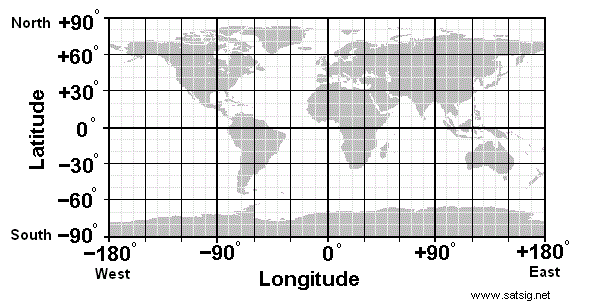

## Simplest type of geospatial data is a point

* Point: single set of coordinates (X, Y) and sometimes Z

```
{
  "type": "Point",
  "coordinates": [-100.5, 100.5]    
}
```

* access them as an ordinary array: `coordinates[0]` (accessing longitude). `coordinates[1]` for latitude.

![](imgs/point.jpg)

## Multipoint: contain several points in the same geometry. 
```
{
  "type": "MultiPoint",
  "coordinates": [[-100.5, 100.5],[-101.5, 99.5], [-99.5, 100.4] ]   
}
```

<img src="imgs/multipoint.png" width="50%">

## Lines

The points are interpreted as vertices for the line rather than three separate points (i.e. the points are connected)

```
{
  "type": "LineString",
  "coordinates": [[-100.5, 100.5],[-101.5, 99.5], [-99.5, 100.4] ]   
}
```

![](imgs/linestring.png)

## A Multiline string

This example contains three distinct lines that make up one single feature.
```
{
  "type": "MultiLineString",
  "coordinates": [
         [[-100.5, 100.5],[-101.5, 99.5], [-99.5, 100.4]],
         [[-100.5, 100.5],[-101.5, 99.5], [-99.5, 100.4]],
         [[-100.5, 100.5],[-101.5, 99.5], [-99.5, 100.4]]
      ]   
}
```

![](imgs/multiline.png)

## A polygon type

Same beginning and end for each line: Forms a cycle. First list is always an outer cycle (ring). The rest of the are inside rings. Think about creating a lake in an island.

```
{
  "type": "Polygon",
  "coordinates": [
           [[-100.5, 100.5],[-101.5, 99.5], [-99.5, 100.4], [-100.5, 100.5]],
           [[-100.4, 101.5],[-101.5, 99.5], [-99.5, 100.4], [-100.4, 101.5]],
           [[-99.5, 101.5],[-101.5, 99.5], [-99.5, 100.4], [-99.5, 101.5]]
           
   ]   
}
```

![](imgs/polygon.png)

## A multipolygon type

List of polygons. 

```
{
  "type": "Polygon",
  "coordinates": [
          [
              [[-100.5, 100.5],[-101.5, 99.5], [-99.5, 100.4], [-100.5, 100.5]],
              [[-100.4, 101.5],[-101.5, 99.5], [-99.5, 100.4], [-100.4, 101.5]],
              [[-99.5, 101.5],[-101.5, 99.5], [-99.5, 100.4], [-99.5, 101.5]]
          ],
                 
          [
              [[-99.5, 101.5],[-101.5, 99.5], [-99.5, 100.4], [-99.5, 101.5]]
          ]
        ]
                 
}
```

![](imgs/multipolygon.png)

## Question

How would you represent the state of Utah?

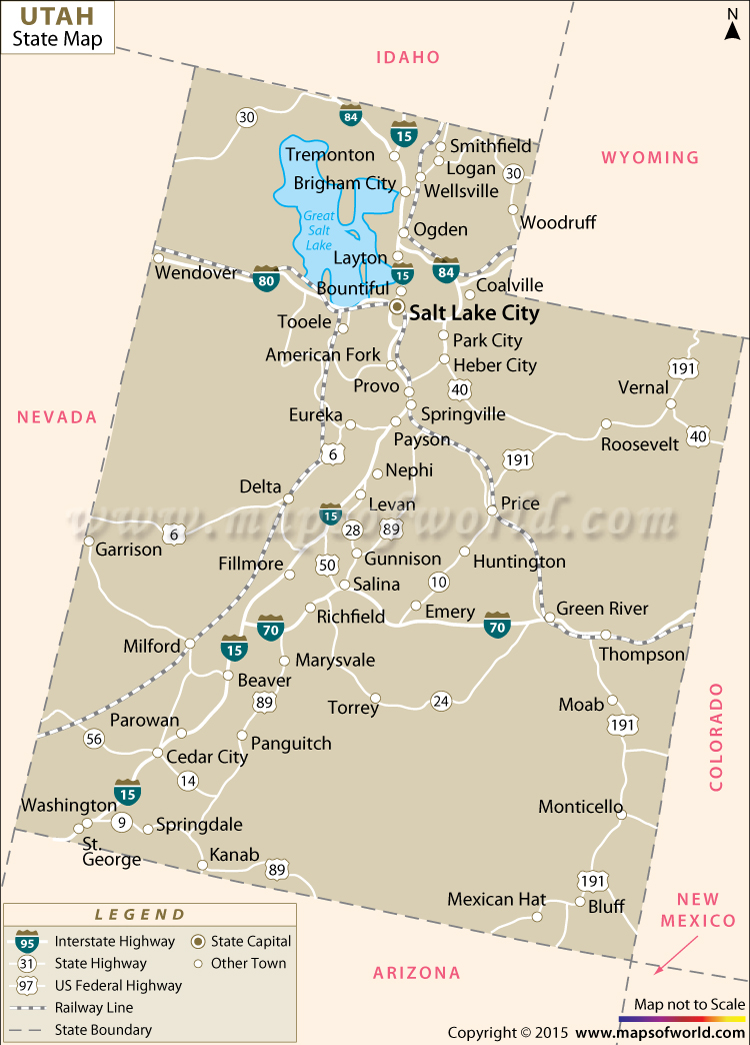

## Features  

We just defined shapes but they are not enough to describe the complex world around us. Most data has identity and attributes. Some polygons are the Lake Superior, other polygons are the border of Africa, and it's important to know which is which.

**Features** are the combination of geometry and properties.

```
{
  "type": "Feature",
  "geometry": {
    "type": "Point",
    "coordinates": [55.7520, 37.6175]
  },
  "properties": {
    "name": "The Moscow Kremlin"
    "age:" "534"
  }
}
```

The properties attached to a feature can be any kind of `JSON` object.

![](imgs/point.jpg)


## FeatureCollection

`FeatureCollection` is the most common thing you will ll see at the top level of `GeoJSON` files in the field.

A `FeatureCollection` containing  "The Moscow Kremlin" example of a Feature looks like:

```
{
  "type": "FeatureCollection",
  "features": [
   {
      "type": "Feature",
      "geometry": {
        "type": "Point",
        "coordinates": [55.7520, 37.6175]
      },
      "properties": {
      "name": "The Moscow Kremlin"
      "age:" "534"
      }
    }
  ]
}
```

`FeatureCollection` is an object that has `type`: `FeatureCollection` and then a list of `Feature` objects under the key "features". 


The list can contain `Feature` objects only - no raw geometries.

More: https://macwright.org/2015/03/23/geojson-second-bite.html

## Quick Practice  (reading the GeoJSON file)

Based on the information in this file, what is being described here?

* https://docs.mapbox.com/help/data/stations.geojson

* If I give you a map of the USA, how will it look?


In [ ]:
import json

In [ ]:
stations = json.load(open('data/stations.geojson'))

In [ ]:
# Careful with printing to screen
# large geojson may crash your browser!

stations.keys()

In [ ]:
stations['type']

In [ ]:
stations['features'][0]

In [ ]:
stations['features'][1]

### Visualizing GeoJson Geometries

* Myriad of visualization software to use
* We will use `Folium`: in notebook plotting; based on popular javascript library.
* Many others (some are complementary):
    - Python: `geopandas`, `shapely` 
    - qGIS, arcGIS,...

# Folium

`Folium` is a Python Library that can allow us to visualize spatial data interactively.  It can be done within the notebook environment.

Quote from the Github page for Folium's Python library:


> Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the `Leaflet.js` library. Manipulate your data in Python, then visualize it in a Leaflet map via Folium.


# Leaflet

* is a widely used open source `JavaScript` library used to build web mapping applications. 
* https://leafletjs.com/


In [ ]:
# Let's create our first map!
# documentation: https://python-visualization.github.io/folium/docs-v0.6.0/modules.html
# pip install folium

import folium

# create map object. Location is San Diego. 

m = folium.Map(location = [32.7157, -117.1611]) # center of the map. Uses lat then lon.
#m


In [ ]:
# create a marker
#  location
# pop-up: when you click on the marker, what should appear. Can contain HTML tags
# Tooltip: what you see when you hoover over
# and then add it to the map

folium.Marker([32.7157, -117.1611], popup = "San Diego", tooltip="Click for more").add_to(m)
#m



In [ ]:
# How to use pre-defined geojson files?

stations = folium.Map(location=[38.8410857803, -76.9750541388])

folium.GeoJson("data/stations.geojson", name = "stations").add_to(stations)
stations

### Browser GeoJson editor

* Highlight certain areas and add them to the map.
* Try it yourself: http://geojson.io/#map=2/20.0/0.0

# Choropleth map

`Wikipedia`:

> A choropleth map (from Greek χώρο (“area/region”) + πλήθος (“multitude”)) is a thematic map in which areas
are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the
map, such as population density or per-capita income.

* Choropleth maps work best as plots of *normalized* data.
* Un-normalized data work beter with e.g. dot plots.



In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import os

unemplpath = os.path.join('data', 'unempl.csv')
geopath = os.path.join('data', 'states.geojson')

df = pd.read_csv(unemplpath)

# intialize a map
states = folium.Map(location=[48, -102], zoom_start = 3)

# add the state boundaries to the map
folium.GeoJson(geopath, name = "states").add_to(states)

# states

In [ ]:
states.choropleth(
    geo_data=geopath,
    name='choropleth',
    data=df,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
)

states

In [ ]:
# Choropleth map for version < 0.6.0

'''
m = folium.Map(location=[48, -102], zoom_start=3)
state_geo = os.path.join('states.geojson')

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=df,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    #fill_opacity=0.7,
    #line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m
'''

## Using Geographical Data

* Sometimes our queries are fundamentally spatial (e.g. tracking animal migrations)
* Sometimes location is just another measurement (e.g. SDPD stops)

### Spatial Paths

* Sometimes GPS data; sometimes observations.
* A sequence of locations *in time*; perhaps with other data
* Sampling: the time intervals at which the measurements are taken


### Example: GPS Data

* [Map My Walk](https://www.mapmywalk.com/us/san-diego-ca/)
* Download .GPX extension; convertible to other file formats
* Read in a csv of Latitude and Longitude
    - Sampling rate is missing (common)
    - Can you guess the sampling rate (big? small?)

In [ ]:
walking = pd.read_csv('data/route_converted.txt', delim_whitespace=True, usecols=['latitude', 'longitude'])
walking.head()

In [ ]:
# create a route centered at the mean lat/long
my_route = folium.Map(location=[walking.latitude.mean(), walking.longitude.mean()], zoom_start=14)

# a list of line segments
folium.PolyLine(walking.values.tolist()).add_to(my_route)

my_route

In [ ]:
# Where did the route start? Which way around the block did they walk?
# Where does this person live? (creepy!)

my_route = folium.Map(location=[walking.latitude.mean(), walking.longitude.mean()], zoom_start=14)

for k, coord in enumerate(walking[['latitude','longitude']].values):
    if k % 100 == 0:
        folium.Marker(location=[coord[0],coord[1]], popup=str(k)).add_to(my_route)
        
    folium.CircleMarker(location=[coord[0],coord[1]], radius=1,color='red').add_to(my_route)
    


my_route

In [ ]:
# Can also plot the usual way!

import matplotlib.pyplot as plt

plt.plot(walking['longitude'], walking['latitude'])
plt.show();


In [ ]:
# What distance did they walk?

## Calculating distance
* Calculating distances between geographical coordinates requires:
    - translating to/from spherical coordinates
    - taking into account the curvature of the earth (when far apart)
    
<img src="imgs/curvature.jpg" width="50%">

## Haversine Distance

* The **Haversine distance** formula gives the distance between two points on a great circle.
* The distance between two points $(\phi_1, \lambda_1)$ and $(\phi_2, \lambda_2)$ is given by:

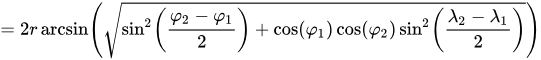

Where the points here are given *in radians*, and $r$ is the radius of the earth (6371.0088 km)

In [ ]:
# calculate the distance
import numpy as np

In [ ]:
rads = walking.applymap(np.deg2rad)

lat1 = rads['latitude']
long1 = rads['longitude']

# To take successive difference, shift arrays up by one.
lat2 = rads['latitude'].iloc[1:].reset_index(drop=True)
long2 = rads['longitude'].iloc[1:].reset_index(drop=True)

lat = lat2 - lat1
long = long2 - long1

In [ ]:
inside = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(long * 0.5) ** 2
distances = 2 * 6371.0088 * np.arcsin(np.sqrt(inside))

In [ ]:
# distance in km
distances.sum()

In [ ]:
# distance in mi
distances.sum() * 0.621

In [ ]:
# Now, imagine: you have 10M routes; this is a single feature you are calculating.

In [ ]:
def haversine(df):
    '''haversine in miles'''
    rads = df.applymap(np.deg2rad)

    lat1 = rads['latitude']
    long1 = rads['longitude']

    # To take successive difference, shift arrays up by one.
    lat2 = rads['latitude'].iloc[1:].reset_index(drop=True)
    long2 = rads['longitude'].iloc[1:].reset_index(drop=True)

    lat = lat2 - lat1
    long = long2 - long1
    
    inside = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(long * 0.5) ** 2
    return 2 * 6371.0088 * np.arcsin(np.sqrt(inside)) * 0.621

### Walking routes: time and altitude
* What is the sampling rate? Can we trust it?
* Can we calculate the speed?
    - should we calculate the speed at every point?

In [ ]:
walkingc = pd.read_csv('data/route-complex.csv')
walkingc.head()

In [ ]:
# create a route centered at the mean lat/long
my_route = folium.Map(location=[walkingc.latitude.mean(), walkingc.longitude.mean()], zoom_start=14)

# a list of line segments
folium.PolyLine(walkingc[['latitude', 'longitude']].values.tolist()).add_to(my_route)

my_route

In [ ]:
walkingc['time'] = pd.to_datetime(walkingc['time'])

In [ ]:
walkingc = walkingc.sort_values(by='time')

In [ ]:
walkingc.head()

In [ ]:
walkingc.time.diff().dt.seconds.value_counts()

In [ ]:
walkingc['diff'] = walkingc.time.diff().dt.seconds

In [ ]:
walkingc.iloc[250:258]

In [ ]:
walkingc['dist'] = haversine(walkingc[['latitude', 'longitude']])

In [ ]:
walkingc.iloc[250:258]

In [ ]:
cdist = walkingc.dist.cumsum()
ctime = walkingc['diff'].cumsum()

In [ ]:
speeds = walkingc['dist'] / walkingc['diff'] * 60 * 60

In [ ]:
speeds.plot()

In [ ]:
walkingc['speeds'] = speeds

In [ ]:
walkingc.iloc[250:258]

In [ ]:
roll60sec = walkingc[['dist', 'diff']].rolling(window=60).sum().dropna()

(roll60sec['dist'] / roll60sec['diff'] * 60 * 60).plot()

### Example: Fin Whales in Baja
* Where do the whales spend most of their time?
* When are they near each other?
* What distance do they travel (e.g. in a month)
* Careful with sampling! How do you think this dataset was created?

In [ ]:
whales = pd.read_csv('data/FinWhales.csv', usecols=['timestamp', 'location-long', 'location-lat', 'individual-local-identifier'])
whales.columns = ['time', 'lon', 'lat', 'id']
whales.head()

In [ ]:
# 8 whales
whales.id.nunique()

In [ ]:
colors = 'red blue green orange yellow black brown cyan'.split()

# create a route centered at the mean lat/long
my_route = folium.Map(location=[whales.lat.mean(), whales.lon.mean()], zoom_start=6)

# a list of line segments
G = whales.groupby('id')
for g in G.groups:
    folium.PolyLine(G.get_group(g)[['lat', 'lon']].values.tolist(), color=colors.pop(), opacity=0.6).add_to(my_route)

my_route

In [ ]:
# How can such a map happen?
# Points on land?
# Point in Pacific?

In [ ]:
last_whale = G.get_group(g)

In [ ]:
# create a route centered at the mean lat/long
my_route = folium.Map(location=[whales.lat.mean(), whales.lon.mean()], zoom_start=6)


folium.PolyLine(last_whale[['lat', 'lon']].values.tolist(), color='red', opacity=0.6).add_to(my_route)

my_route

In [ ]:
# plot a 2d histogram
plt.hist2d(last_whale['lon'].values, last_whale['lat'].values, bins=20);

In [ ]:
# get the data
pdf, xs, ys = np.histogram2d(last_whale['lon'].values, last_whale['lat'].values, bins=5, density=True)

In [ ]:
pdf

In [ ]:
xs

In [ ]:
ys

In [ ]:
pdf, xs, ys = np.histogram2d(whales['lon'].values, whales['lat'].values, bins=20, density=True)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

xpos, ypos = np.meshgrid(xs[:-1] + 0.25, ys[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = pdf.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()

### Folium `HeatMap`
* If you only need visualization, folium can plot smoothed data using `HeatMap`

In [ ]:
# Heatmaps
from folium import plugins
from folium.plugins import HeatMap


heat_locs = folium.Map(location=[whales.lat.mean(), whales.lon.mean()], zoom_start=6)
HeatMap(last_whale[['lat', 'lon']].values.tolist()).add_to(heat_locs)
heat_locs

### Whales: Conclusions
* Long sampling rate leads to: noisy observations and loss of sequential faithfulness.
* Spatial binning can smooth the tracking data
    - Notice the outliers diminished in influence!
* Other techniques include:
    - Buffering (a band of uncertainty around the path)
    

### Spatial Attributes
* SDPD each stop has location attributes (`service_area`)
    - GeoJson is additional spatial information to *join* to our data.
* Need to aggregate all stops in a service_area to an attribute of the service area (change in granularity).
    - are there patterns to these attributes by service area?
    - Do those patterns vary with adjacent with geographical notions of distance?
    - Do (geographically) nearby regions have more strongly correlated features?

### Example: SDPD search rates
* Plot a choropleth of search rates
* In joining `stops` with GeoJson, must be careful that
    - data types match,
    - the "join keys" between `stops` and the GeoJson match

In [ ]:
stops = pd.read_csv('../06/stops_2016.csv')
geojson = 'data/pd_beats_datasd.geojson'

In [ ]:
# intialize a map
service_areas = folium.Map(location=[32.7446, -117.1291], zoom_start = 10)

In [ ]:
def clean_search(x):
    if x in ['n', 'N']:
        return 0
    elif x in ['y', 'Y']:
        return 1
    else:
        return np.NaN
    
    
def clean_service(x):
    '''what happens if we return strings? why?'''
    try:
        return int(x)
    except:
        return np.NaN

stops['service_area'] = stops.service_area.apply(clean_service)
stops['searched'] = stops.searched.apply(clean_search)

In [ ]:
df = stops.groupby('service_area').searched.mean().rename('search rate').reset_index()
df.head()

In [ ]:
service_areas.choropleth(
    geo_data=geojson,
    name='choropleth',
    data=df,
    columns=['service_area', 'search rate'],
    key_on='feature.properties.serv',  # why this key?
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Search Rate'
)

In [ ]:
service_areas

In [ ]:
service_areas.save('out.html')